In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import networkx as nx
import time

In [2]:
def push(G, node_u, p, r, d, alpha):

    pi = p
    ri = r
    pi[node_u] = p[node_u] + alpha * r[node_u]
    ri[node_u] = (1-alpha) * r[node_u] / 2

    for node_v in G.neighbors(node_u):
        ri[node_v] = r[node_v] + (1-alpha) * r[node_u] / (2 * d[node_u])

    return pi, ri

In [9]:
def approximatePageRank(G, target_node, alpha, epsilon):

    nodes = list(G.nodes())
    nodes_vector = np.array(nodes)

    #pagerank
    p = {}
    for n in nodes:
        p[n] = 0

    #residuals
    r = {}
    for n in nodes:
        r[n] = 0
    r[target_node] = 1
    r_vector = np.array(list(r.values()))

    #degrees
    d = {}
    for n in nodes:
        d[n] = G.degree(n)
    d_vector = np.array(list(d.values()))

    stopping_condition = (r_vector / d_vector) >= epsilon
    queue = nodes_vector[stopping_condition]
    #valid_nodes = np.nonzero(d_vector)[0]
    #print(len(valid_nodes))

    while(any(stopping_condition)):
        u = queue[0]
        p, r = push(G, u, p, r, d, alpha)
        r_vector = np.array(list(r.values()))
        #stopping_condition = (r_vector[valid_nodes] / d_vector[valid_nodes]) >= epsilon
        stopping_condition = (r_vector / d_vector) >= epsilon
        #queue = np.array(nodes)[valid_nodes][stopping_condition]
        queue = nodes_vector[stopping_condition]

    p_vector = list(p.values())

    # normalize pageRank vector
    P = sum(p_vector)
    p_vector = np.array(p_vector)/P
    p_vector[np.argmax(p_vector)] = 0

    return p_vector

Name: 
Type: Graph
Number of nodes: 7440
Number of edges: 27794
Average degree:   7.4715

Our implementation of ApproximatePageRank of the node 100
Elapsed time: 0.252870 seconds


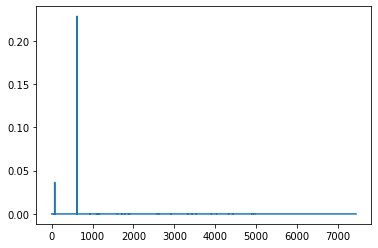


Networkx implementation of PageRank
Elapsed time: 2.529857 seconds


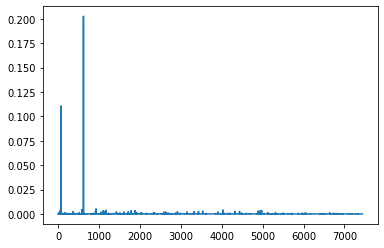

In [10]:
node_target = 100

path = 'data/lastfm_asia_7000.csv'
G = nx.read_edgelist(path, delimiter=',', nodetype=int)
A = nx.linalg.graphmatrix.adjacency_matrix(G)
print(nx.info(G))
print()

# plot matrix
#plt.spy(A,marker=',')
#plt.show()
#print()

start = time.time()
pg = approximatePageRank(G, node_target, 0.15, 1e-5)
stop = time.time()
print('Our implementation of ApproximatePageRank of the node', node_target)
print('Elapsed time:', str(stop-start)[0:8], 'seconds')
plt.plot(pg)
plt.show()
print()

start = time.time()
p = nx.pagerank(G, personalization={node_target:1}, max_iter=40, weight=None)
#p = nx.pagerank(G, personalization={9:1}, max_iter=40, weight=None, tol=1e-2, alpha=0.85)
stop = time.time()
print('Networkx implementation of PageRank')
print('Elapsed time:', str(stop-start)[0:8], 'seconds')
p = list(p.values())
p[np.argmax(p)] = 0
plt.plot(p)
plt.show()

Name: 
Type: Graph
Number of nodes: 22470
Number of edges: 171002
Average degree:  15.2205

Our implementation of ApproximatePageRank of the node 100
Elapsed time: 0.975188 seconds


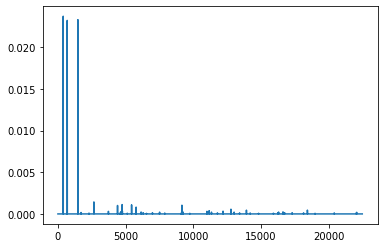


Networkx implementation of PageRank
Elapsed time: 11.64515 seconds


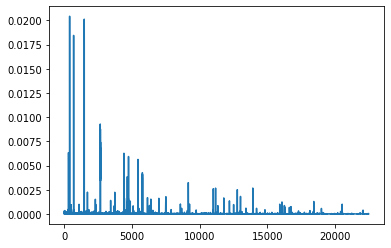

In [11]:
node_target = 100

path = 'data/musae_facebook_22000.csv'
G = nx.read_edgelist(path, delimiter=',', nodetype=int)
A = nx.linalg.graphmatrix.adjacency_matrix(G)
print(nx.info(G))
print()

# plot matrix
#plt.spy(A,marker=',')
#plt.show()
#print()

start = time.time()
pg = approximatePageRank(G, node_target, 0.15, 1e-5)
stop = time.time()
print('Our implementation of ApproximatePageRank of the node', node_target)
print('Elapsed time:', str(stop-start)[0:8], 'seconds')
plt.plot(pg)
plt.show()
print()

start = time.time()
p = nx.pagerank(G, personalization={node_target:1}, max_iter=40, weight=None)
stop = time.time()
print('Networkx implementation of PageRank')
print('Elapsed time:', str(stop-start)[0:8], 'seconds')
p = list(p.values())
p[np.argmax(p)] = 0
plt.plot(p)
plt.show()

Name: 
Type: Graph
Number of nodes: 334863
Number of edges: 925872
Average degree:   5.5299

Our implementation of ApproximatePageRank of the node 100
Elapsed time: 28.23484 seconds


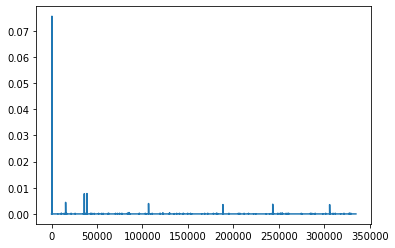


Networkx implementation of PageRank
Elapsed time: 36.27285 seconds


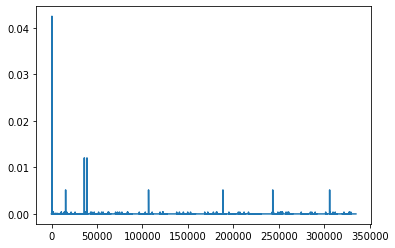

In [12]:
node_target = 100

path = 'data/amazon_335000.txt'
G = nx.read_edgelist(path, delimiter='\t', nodetype=int)
A = nx.linalg.graphmatrix.adjacency_matrix(G)
print(nx.info(G))
print()

# plot matrix
#plt.spy(A,marker=',')
#plt.show()
#print()

start = time.time()
pg = approximatePageRank(G, node_target, 0.15, 1e-5)
stop = time.time()
print('Our implementation of ApproximatePageRank of the node', node_target)
print('Elapsed time:', str(stop-start)[0:8], 'seconds')
plt.plot(pg)
plt.show()
print()

start = time.time()
p = nx.pagerank(G, personalization={node_target:1}, max_iter=40, weight=None)
stop = time.time()
print('Networkx implementation of PageRank')
print('Elapsed time:', str(stop-start)[0:8], 'seconds')
p = list(p.values())
p[np.argmax(p)] = 0
plt.plot(p)
plt.show()

In [ ]:
node_target = 1000

path = 'data/youtube_1135000.txt'
G = nx.read_edgelist(path, delimiter='\t', nodetype=int)
A = nx.linalg.graphmatrix.adjacency_matrix(G)
print(nx.info(G))
print()

# plot matrix
#plt.spy(A,marker=',')
#plt.show()
#print()

start = time.time()
pg = approximatePageRank(G, node_target, 0.15, 1e-5)
stop = time.time()
print('Our implementation of ApproximatePageRank of the node', node_target)
print('Elapsed time:', str(stop-start)[0:8], 'seconds')
plt.plot(pg)
plt.show()
print()

start = time.time()
p = nx.pagerank(G, personalization={node_target:1}, max_iter=40, weight=None)
stop = time.time()
print('Networkx implementation of PageRank')
print('Elapsed time:', str(stop-start)[0:8], 'seconds')
p = list(p.values())
p[np.argmax(p)] = 0
plt.plot(p)
plt.show()